# GIS tutorial
---

- Python을 이용해서 지도를 시각화하는 방법 정리

# 지도 데이터셋

- 지도 데이터를 수집 시 인증된 곳에서 내려받는 것을 추천(좌표계, 지역명 등의 이유)
- 국토교통부 국토지리정보원 https://map.ngii.go.kr/mn/mainPage.do
- 국가데이터처(구 통계청) 통계지리정보서비스 https://sgis.kostat.go.kr/view/index


In [1]:
import os # 운영체제 관련 기능
import pandas as pd # 데이터프레임 생성 및 조작
import numpy as np # 수치 계산

# 한글이 깨지지 않도록 폰트 설정 (matplotlib 사용 시)
import matplotlib.pyplot as plt # 시각화

plt.rc('font', family='Malgun Gothic')  # Windows의 경우 'Malgun Gothic', macOS는 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

In [2]:
import geopandas as gpd # 지리정보데이터프레임 생성 및 조작
from shapely.geometry import Point # 점(위도, 경도) 좌표 데이터 생성
# import folium # 대화형 지도 시각화

# 시군구 지도를 겹치기
# 경상남도 읍면동 지도 데이터 불러오기# 경상남도 읍면동 지도 데이터 불러오기
gyeongnam_si_map = gpd.read_file("G:/내 드라이브/datasets/SGIS지도/bnd_sigungu_38_2024_2Q/bnd_sigungu_38_2024_2Q.shp") #, encoding="cp949"

# 경상남도 읍면동 지도 데이터 불러오기#
#  경상남도 읍면동 지도 데이터 불러오기
gyeongnam_dong_map = gpd.read_file("G:/내 드라이브/datasets/SGIS지도/bnd_dong_38_2024_2Q/bnd_dong_38_2024_2Q.shp") # 인토딩 문제 발생시 encoding="cp949" 또는 "utf-8" 등을 이용

In [3]:
gyeongnam_si_map.head()

,BASE_DATE,SIGUNGU_NM,SIGUNGU_CD,geometry
0,20240630,진주시,38030,"POLYGON ((1059659.398 1706201.131, 1059687.309..."
1,20240630,통영시,38050,"MULTIPOLYGON (((1089649.319 1611963.497, 10896..."
2,20240630,사천시,38060,"MULTIPOLYGON (((1052230.911 1654966.097, 10522..."
3,20240630,김해시,38070,"POLYGON ((1123846.138 1711940.967, 1123874.672..."
4,20240630,밀양시,38080,"POLYGON ((1131405.546 1738082.882, 1131509.204..."


In [4]:
gyeongnam_dong_map.head()

,BASE_DATE,ADM_NM,ADM_CD,geometry
0,20240630,내동면,38030310,"POLYGON ((1051152.178 1685692.155, 1051155.204..."
1,20240630,삼동면,38550330,"MULTIPOLYGON (((1047501.639 1649023.67, 104750..."
2,20240630,미조면,38550340,"MULTIPOLYGON (((1050690.439 1641171.779, 10506..."
3,20240630,산청읍,38570110,"POLYGON ((1040080.431 1714614.036, 1040083.659..."
4,20240630,차황면,38570310,"POLYGON ((1041681.177 1724776.041, 1041684.226..."


In [5]:
gyeongnam_si_map.crs # 좌표계 정보 확인

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### 지도 파일

- DATE, CD, NM, geometry 로 구성
- CD는 우리나라 행정구역코드로 지역 수치자료에 연계시 키값의 역할
- 수치지도 동읍면지도에는 어느 시인지에 대한 정보는 행정구역코드에 있다. 

In [6]:
# ADM_NM의 중복동읍면명을 확인하고 2개 이상인 것만 출력
gyeongnam_dong_map['ADM_NM'].value_counts()[gyeongnam_dong_map['ADM_NM'].value_counts() > 1]

ADM_NM
중앙동    4
대산면    2
상동면    2
Name: count, dtype: int64

In [7]:
gyeongnam_dong_map[gyeongnam_dong_map['ADM_NM'] == '중앙동']

,BASE_DATE,ADM_NM,ADM_CD,geometry
89,20240630,중앙동,38030740,"POLYGON ((1054547.707 1689175.834, 1054545.492..."
121,20240630,중앙동,38050530,"POLYGON ((1084853.187 1650922.975, 1084854.18 ..."
135,20240630,중앙동,38112520,"POLYGON ((1106751.725 1693547.586, 1106768.671..."
291,20240630,중앙동,38100580,"POLYGON ((1139487.691 1704800.482, 1139487.777..."


In [8]:
# gyeongnam_si_map의 SIGUNGU_CD가 38030, 38050, 38112, 38100인 행 추출
selected_si_codes = ['38030', '38050', '38112', '38100']
gyeongnam_si_map[gyeongnam_si_map['SIGUNGU_CD'].isin(selected_si_codes)]  # isin() 메서드를 사용하여 여러 값과 비교


,BASE_DATE,SIGUNGU_NM,SIGUNGU_CD,geometry
0,20240630,진주시,38030,"POLYGON ((1059659.398 1706201.131, 1059687.309..."
1,20240630,통영시,38050,"MULTIPOLYGON (((1089649.319 1611963.497, 10896..."
6,20240630,양산시,38100,"POLYGON ((1141138.271 1727034.957, 1141132.789..."
8,20240630,창원시 성산구,38112,"MULTIPOLYGON (((1099765.417 1686627.551, 10997..."


> 진주, 통영, 양상, 창원에 중앙동이 있기 때문에 동읍면 행정구역코드의 앞자리 5자리에 맞쳐서 지역 수치자료를 연계해야 한다. 

## 지도 그리기

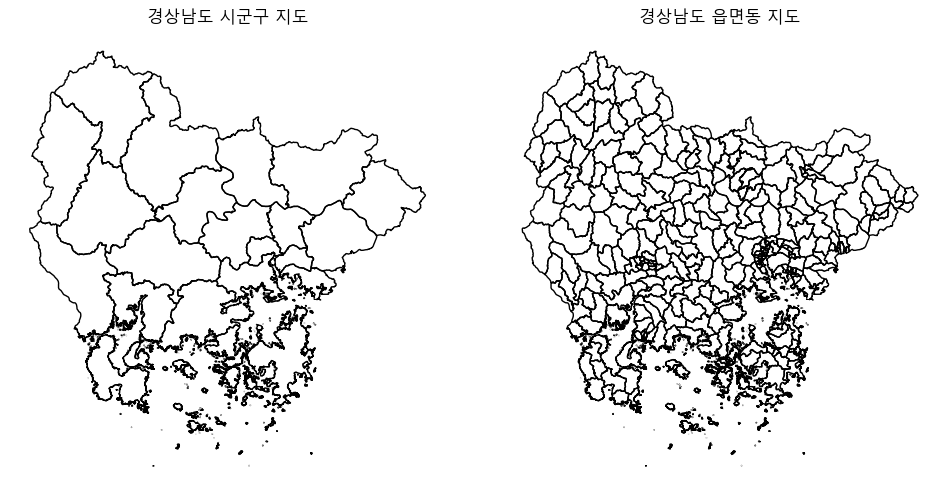

In [9]:
# 지도를 양옆으로 그릭
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1행 2열의 서브플롯 생성

# 지도 확인
gyeongnam_si_map.plot(ax=axes[0], color='none', edgecolor='black')
axes[0].set_title('경상남도 시군구 지도')
axes[0].axis('off')  # 축 숨기기
gyeongnam_dong_map.plot(ax=axes[1], color='none', edgecolor='black')
axes[1].set_title('경상남도 읍면동 지도')
axes[1].axis('off')  # 축 숨기기

plt.tight_layout() # 레이아웃 조정
plt.show() # 시각화 출력, 안해도 보여줌(주피터 노트북에서는)

### 지역명 표시

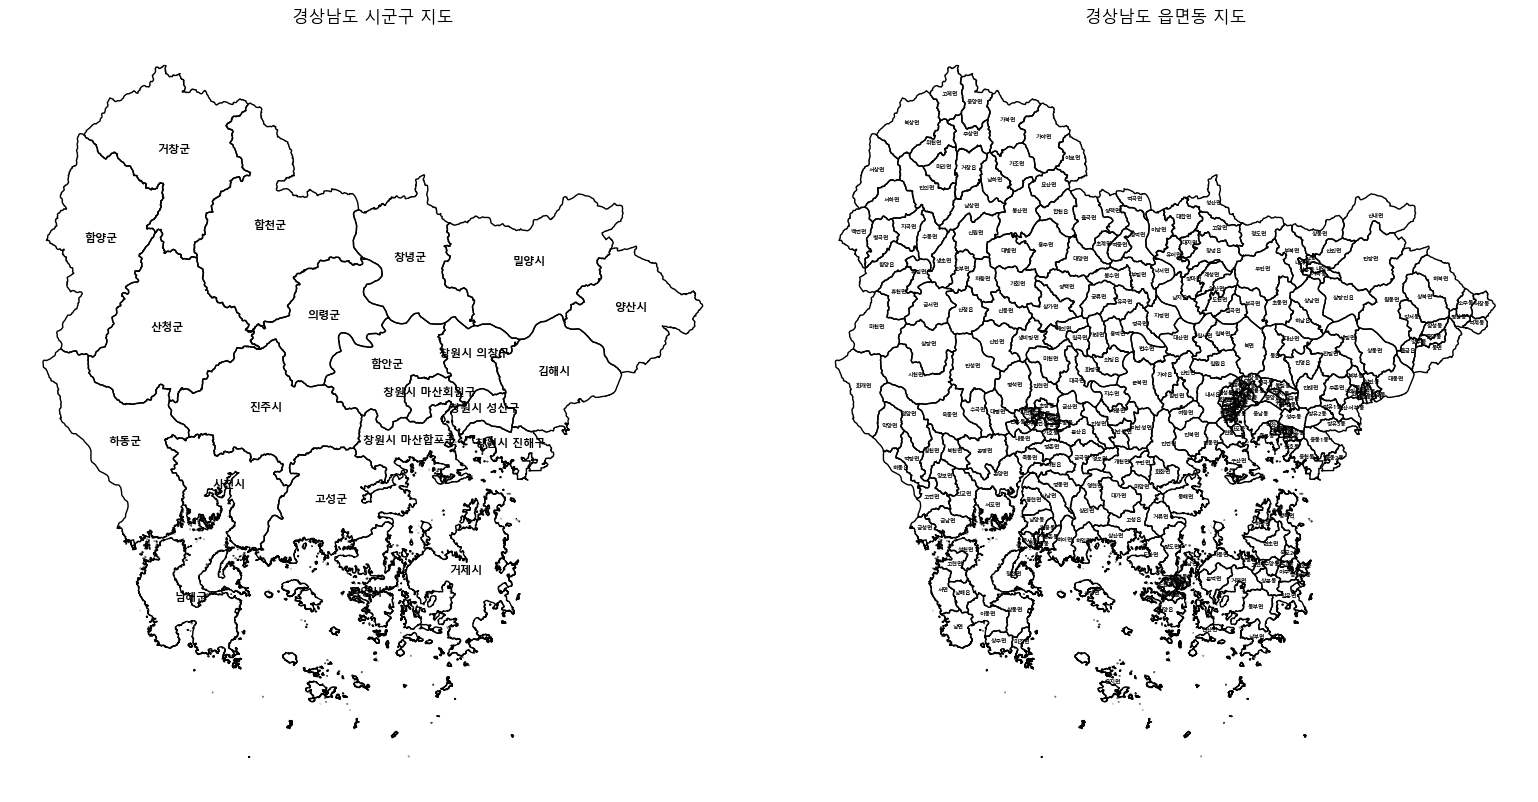

In [10]:
# 지도를 양옆으로 그릭
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # 1행 2열의 서브플롯 생성

# 지도 확인
gyeongnam_si_map.plot(ax=axes[0], color='none', edgecolor='black')
axes[0].set_title('경상남도 시군구 지도')
axes[0].axis('off')  # 축 숨기기
gyeongnam_dong_map.plot(ax=axes[1], color='none', edgecolor='black')
axes[1].set_title('경상남도 읍면동 지도')
axes[1].axis('off')  # 축 숨기기

for idx, row in gyeongnam_si_map.iterrows():
    # Calculate the centroid (center point) of each polygon
    centroid = row.geometry.centroid
    axes[0].annotate(
        text=row['SIGUNGU_NM'], # The name to display
        xy=(centroid.x, centroid.y),
        ha='center', # Horizontal alignment
        fontsize=8,
        fontweight='bold',
        color='black'
    )

for idx, row in gyeongnam_dong_map.iterrows():
    # Calculate the centroid (center point) of each polygon
    centroid = row.geometry.centroid
    axes[1].annotate(
        text=row['ADM_NM'], # The name to display
        xy=(centroid.x, centroid.y),
        ha='center', # Horizontal alignment
        fontsize=4,
        fontweight='bold',
        color='black'
    )


plt.tight_layout() # 레이아웃 조정
plt.show() # 시각화 출력, 안해도 보여줌(주피터 노트북에서는)

### 지역명을 표시하는 글자의 겹침해결 방법

- 글자크기, 위치 등을 조정
- 라이브러리 이용

In [11]:
#!pip install adjustText

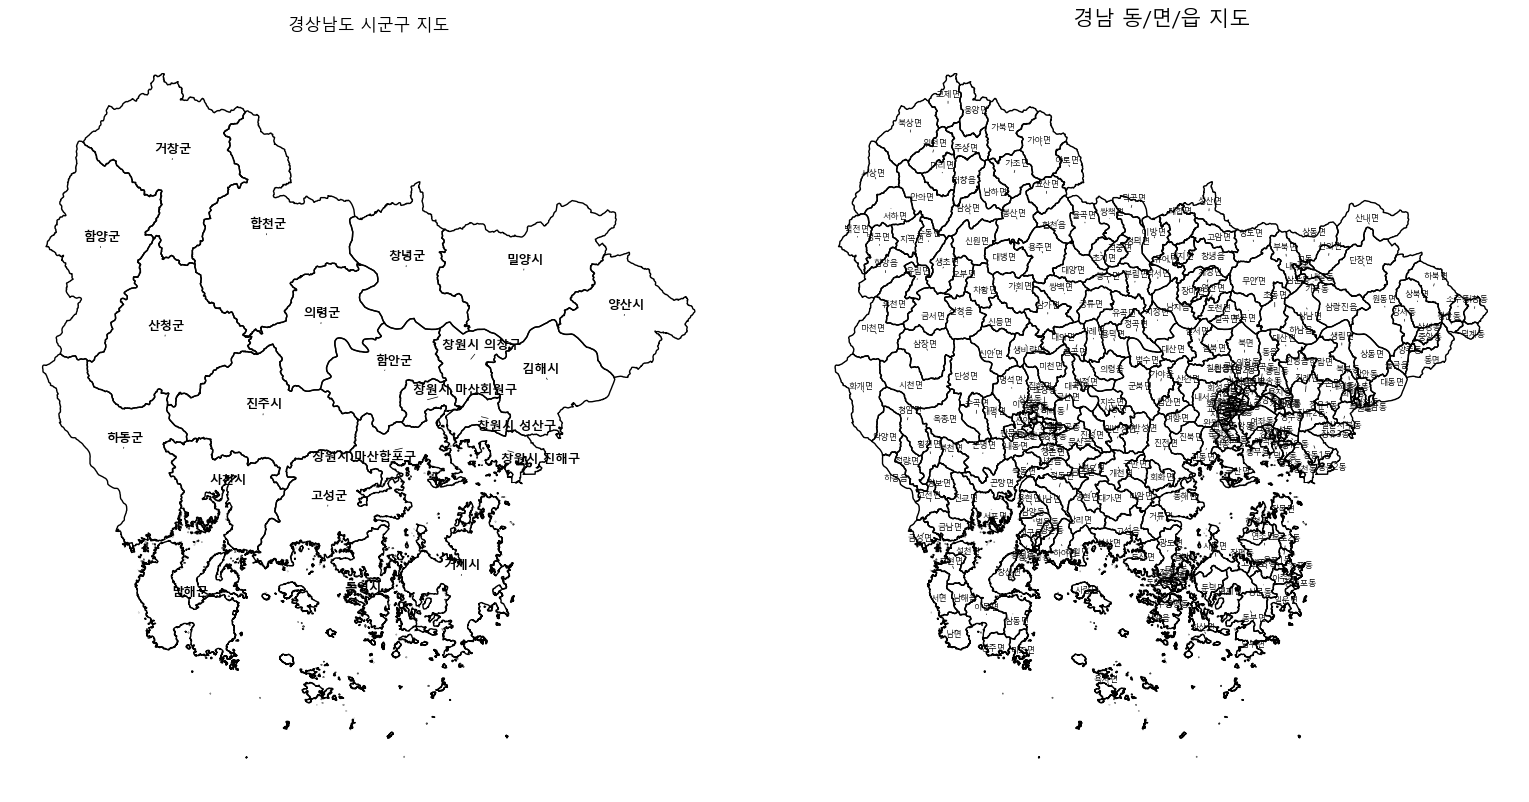

In [12]:
from adjustText import adjust_text

# 지도를 양옆으로 그릭
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) # 1행 2열의 서브플롯 생성

# 지도 확인
gyeongnam_si_map.plot(ax=axes[0], color='none', edgecolor='black')
axes[0].set_title('경상남도 시군구 지도')
axes[0].axis('off')  # 축 숨기기
gyeongnam_dong_map.plot(ax=axes[1], color='none', edgecolor='black')
axes[1].set_title('경상남도 읍면동 지도')
axes[1].axis('off')  # 축 숨기기

texts_si = [] # 시/군 레이블 객체를 저장할 리스트

# 시/군 지도에 지역명 추가
for idx, row in gyeongnam_si_map.iterrows():
    # 폴리곤의 중심점 (centroid) 계산
    centroid = row.geometry.centroid
    
    # 텍스트 레이블 객체 생성
    texts_si.append(
        axes[0].text(
            centroid.x,
            centroid.y,
            row['SIGUNGU_NM'], # ADM_NM 컬럼의 값 사용
            ha='center',
            fontsize=9,
            fontweight='bold',
            color='black'
        )
    )
# **레이블 겹침 방지 (시/군 레벨):**
# 'adjustText' 라이브러리를 설치했다면 이 기능을 사용하여 레이블 위치를 조정합니다.
# (설치: pip install adjustText)
try:
    adjust_text(texts_si, only_move={'points':'y', 'text':'y', 'objects':'y'}, arrowprops=dict(arrowstyle="-", color='black', lw=0.5), ax=axes[0])
except NameError:
    pass # adjustText가 설치되지 않았다면 무시하고 그냥 진행

gyeongnam_dong_map.plot(ax=axes[1], color='none', edgecolor='black', linewidth=0.2)
axes[1].set_title('경남 동/면/읍 지도', fontsize=15, pad=10)
axes[1].set_axis_off()

texts_dong = [] # 동/면/읍 레이블 객체를 저장할 리스트
for idx, row in gyeongnam_dong_map.iterrows():
    centroid = row.geometry.centroid
    texts_dong.append(
        axes[1].text(
            centroid.x, 
            centroid.y, 
            row['ADM_NM'], 
            ha='center', 
            fontsize=6,
            color='black'
        )
    )
try:
    adjust_text(texts_dong, only_move={'points':'y', 'text':'y', 'objects':'y'}, arrowprops=dict(arrowstyle="-", color='black', lw=0.5), ax=axes[1])
except NameError:
    pass

plt.tight_layout()
plt.show()

### 일부 지역 추출

지역명 또는 지역코드를 확인하고 수행
- 지역과 구 이름이 있을 경우를 제외하고는 지역명으로 추출하여 수행

In [14]:
gyeongnam_si_map['SIGUNGU_NM'].unique()

array(['진주시', '통영시', '사천시', '김해시', '밀양시', '거제시', '양산시', '창원시 의창구',
       '창원시 성산구', '창원시 마산합포구', '창원시 마산회원구', '창원시 진해구', '의령군', '함안군',
       '창녕군', '고성군', '남해군', '하동군', '산청군', '함양군', '거창군', '합천군'],
      dtype=object)

In [17]:
# 창원시 행정구역코드 확인
# SIGUNGU_NM의 앞글자가 '창원시'인 행 추출
gyeongnam_changwon = gyeongnam_si_map[gyeongnam_si_map['SIGUNGU_NM'].str.startswith('창원시')] # 함수를 이용해서 앞글자가 포함된 행 추출
gyeongnam_changwon

,BASE_DATE,SIGUNGU_NM,SIGUNGU_CD,geometry
7,20240630,창원시 의창구,38111,"POLYGON ((1100797.996 1710527.139, 1100806.716..."
8,20240630,창원시 성산구,38112,"MULTIPOLYGON (((1099765.417 1686627.551, 10997..."
9,20240630,창원시 마산합포구,38113,"MULTIPOLYGON (((1097970.748 1674788.189, 10979..."
10,20240630,창원시 마산회원구,38114,"POLYGON ((1096197.607 1698466.405, 1096230.623..."
11,20240630,창원시 진해구,38115,"MULTIPOLYGON (((1106623.31 1674114.501, 110662..."


C:\Users\sungh\AppData\Local\Temp\ipykernel_16608\2161236844.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


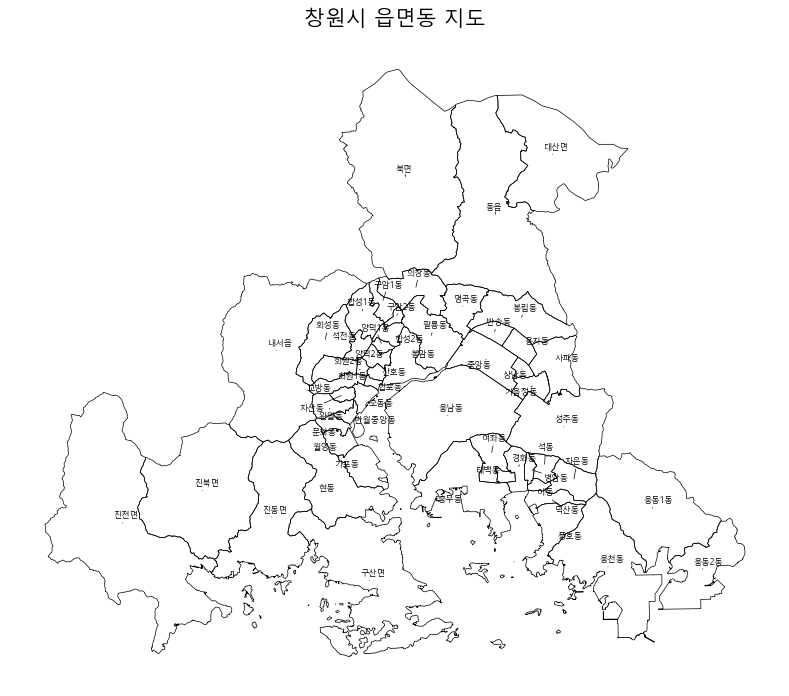

In [25]:
# 창원 지역만 추출해서 그리기
# 행정구역코드(ADM_CD) 앞자리 3811인 행 추출
gyeongnam_changwon_dong = gyeongnam_dong_map[gyeongnam_dong_map['ADM_CD'].str.startswith('3811')] # ADM_CD 자료형 확인 필요

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gyeongnam_changwon_dong.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
ax.set_title('창원시 읍면동 지도', fontsize=15, pad=10)
ax.set_axis_off()

texts_dong = [] # 동/면/읍 레이블 객체를 저장할 리스트
for idx, row in gyeongnam_changwon_dong.iterrows():
    centroid = row.geometry.centroid
    texts_dong.append(
        ax.text(
            centroid.x, 
            centroid.y, 
            row['ADM_NM'], 
            ha='center', 
            fontsize=6,
            color='black'
        )
    )
try:
    adjust_text(texts_dong, only_move={'points':'y', 'text':'y', 'objects':'y'}, arrowprops=dict(arrowstyle="-", color='black', lw=0.5), ax=ax)
except NameError:
    pass

fig.tight_layout()
fig.show()
    
plt.tight_layout()
plt.show()

### 겹쳐 그리기

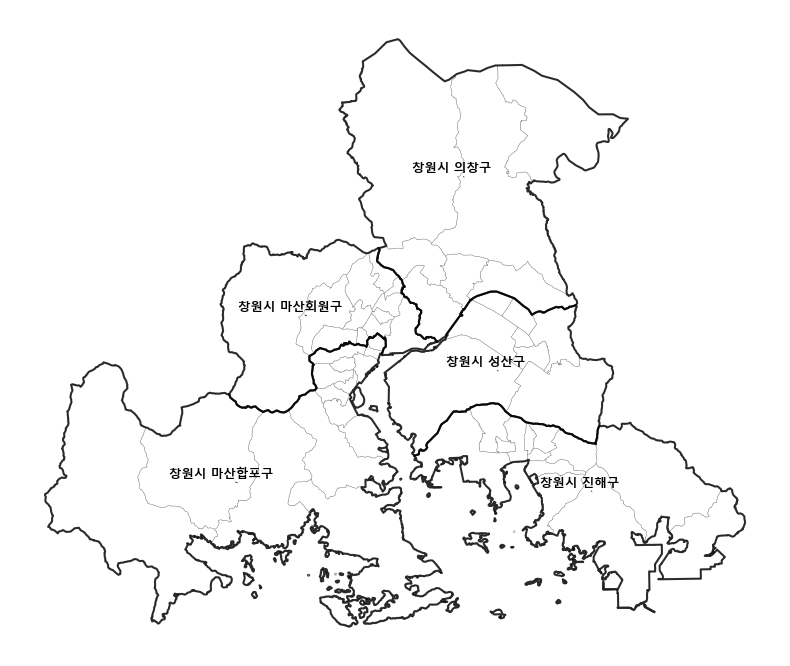

In [28]:
# 시각화를 위한 figure와 axes 객체 생성
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# 첫 번째 지도 (읍면동 지도) 그리기
# 읍면동은 배경으로 깔고, 테두리를 옅은 색으로 처리합니다.
gyeongnam_changwon_dong.plot(ax=ax, color='white', edgecolor='gray', linewidth=0.3)

# 두 번째 지도 (시군구 지도) 경계선 겹쳐 그리기
# 시군구는 내부를 채우지 않고 경계선만 강조합니다.
gyeongnam_changwon.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5, alpha=0.8)
ax.axis('off')  # 축 숨기기
# 시/군 지도에 지역명 추가
texts_si = [] # 시/군 레이블 객체를 저장할 리스트
for idx, row in gyeongnam_changwon.iterrows():
    centroid = row.geometry.centroid # 폴리곤의 중심점 (centroid) 계산
    # 텍스트 레이블 객체 생성
    texts_si.append(
        ax.text(
            centroid.x,
            centroid.y,
            row['SIGUNGU_NM'], # ADM_NM 컬럼의 값 사용
            ha='center',
            fontsize=9,
            fontweight='bold',
            color='black'
        )
    )
try:
    adjust_text(texts_si, only_move={'points':'y', 'text':'y', 'objects':'y'}, arrowprops=dict(arrowstyle="-", color='black', lw=0.5), ax=ax)
except NameError:
    pass # adjustText가 설치되지 않았다면 무시하고 그냥 진행
plt.tight_layout()
plt.show()